以下是常见的回归损失函数：MSE、MAE、Huber Loss、Log-Cosh Loss 和 Quantile Loss 的 NumPy 实现（适用于向量化计算）：

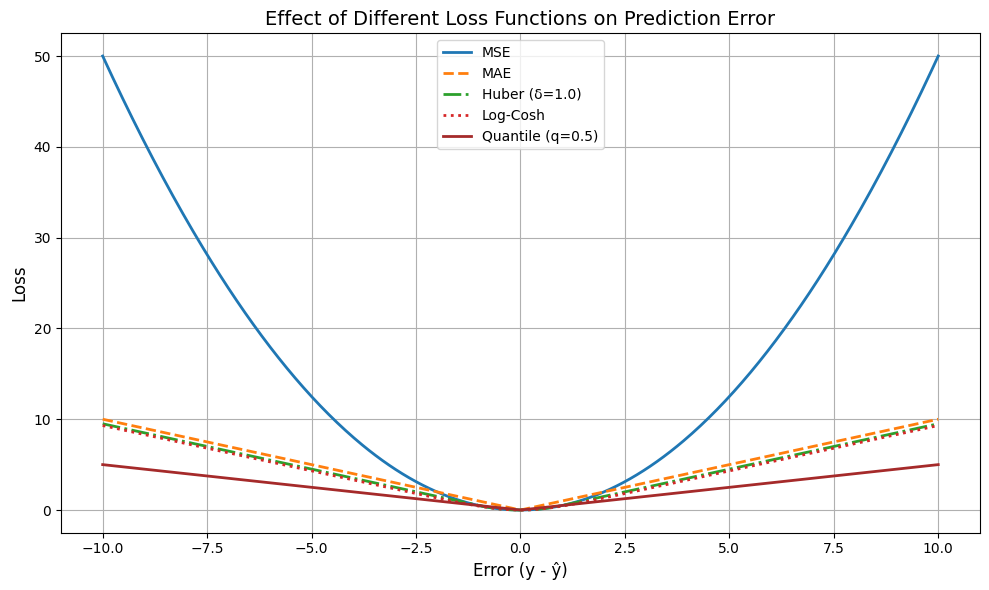

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 设置误差范围：从 -10 到 10
a = np.linspace(-10, 10, 500)

# 均方误差（MSE）
mse = 0.5 * a**2

# 绝对误差（MAE）
mae = np.abs(a)

# Huber Loss
delta = 1.0
huber = np.where(np.abs(a) <= delta,
                 0.5 * a**2,
                 delta * (np.abs(a) - 0.5 * delta))

# Log-Cosh Loss
log_cosh = np.log(np.cosh(a))

# Quantile Loss (q = 0.5)
q = 0.5
quantile = np.maximum(q * a, (q - 1) * a)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(a, mse, label="MSE", linestyle='-', linewidth=2)
plt.plot(a, mae, label="MAE", linestyle='--', linewidth=2)
plt.plot(a, huber, label="Huber (δ=1.0)", linestyle='-.', linewidth=2)
plt.plot(a, log_cosh, label="Log-Cosh", linestyle=':', linewidth=2)
plt.plot(a, quantile, label="Quantile (q=0.5)", linestyle='-', linewidth=2, color='brown')

plt.title("Effect of Different Loss Functions on Prediction Error", fontsize=14)
plt.xlabel("Error (y - ŷ)", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
import numpy as np

# Loss Functions for Regression Tasks

# Mean Squared Error (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Huber Loss
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

# Log-Cosh Loss
def log_cosh_loss(y_true, y_pred):
    error = y_true - y_pred
    return np.mean(np.log(np.cosh(error)))

# Quantile Loss
def quantile_loss(y_true, y_pred, quantile=0.5):
    error = y_true - y_pred
    return np.mean(np.maximum(quantile * error, (quantile - 1) * error))

# Example usage
y_true = np.array([3.0, 5.0, 7.0])
y_pred = np.array([2.5, 5.0, 8.0])

print("MSE:", mse(y_true, y_pred))
print("MAE:", mae(y_true, y_pred))
print("Huber:", huber_loss(y_true, y_pred))
print("Log-Cosh:", log_cosh_loss(y_true, y_pred))
print("Quantile (q=0.7):", quantile_loss(y_true, y_pred, quantile=0.7))

MSE: 0.4166666666666667
MAE: 0.5
Huber: 0.20833333333333334
Log-Cosh: 0.18463177914710152
Quantile (q=0.7): 0.21666666666666667


In [ ]:
# 练习: 使用pytorch实现这些损失函数
import torch

# Mean Squared Error (MSE) in PyTorch
def mse_torch(y_true, y_pred):
    pass

# Mean Absolute Error (MAE) in PyTorch
def mae_torch(y_true, y_pred):
    pass

# Huber Loss in PyTorch
def huber_loss_torch(y_true, y_pred, delta=1.0):
    pass

def log_cosh_loss_torch(y_true, y_pred):
    pass

def quantile_loss_torch(y_true, y_pred, quantile=0.5):
    pass

# Example usage in PyTorch
# 不要修改以下代码
y_true_torch = torch.tensor([3.0, 5.0, 7.0])
y_pred_torch = torch.tensor([2.5, 5.0, 8.0])

print("MSE (PyTorch):", mse_torch(y_true_torch, y_pred_torch))
print("MAE (PyTorch):", mae_torch(y_true_torch, y_pred_torch))
print("Huber (PyTorch):", huber_loss_torch(y_true_torch, y_pred_torch))
print("Log-Cosh (PyTorch):", log_cosh_loss_torch(y_true_torch, y_pred_torch))

print("Quantile (q=0.7) (PyTorch):", quantile_loss_torch(y_true_torch, y_pred_torch, quantile=0.7))
assert torch.allclose(mse_torch(y_true_torch, y_pred_torch), torch.tensor(0.4167), atol=1e-4)
assert torch.allclose(mae_torch(y_true_torch, y_pred_torch), torch.tensor(0.5000), atol=1e-4)
assert torch.allclose(huber_loss_torch(y_true_torch, y_pred_torch), torch.tensor(0.2083), atol=1e-4)
assert torch.allclose(log_cosh_loss_torch(y_true_torch, y_pred_torch), torch.tensor(0.1846), atol=1e-4)
assert torch.allclose(quantile_loss_torch(y_true_torch, y_pred_torch, quantile=0.7), torch.tensor(0.2167), atol=1e-4)
print("恭喜你！测试通过！")


MSE (PyTorch): tensor(0.4167)
MAE (PyTorch): tensor(0.5000)
Huber (PyTorch): tensor(0.2083)
Log-Cosh (PyTorch): tensor(0.1846)
Quantile (q=0.7) (PyTorch): tensor(0.2167)
恭喜你！测试通过！


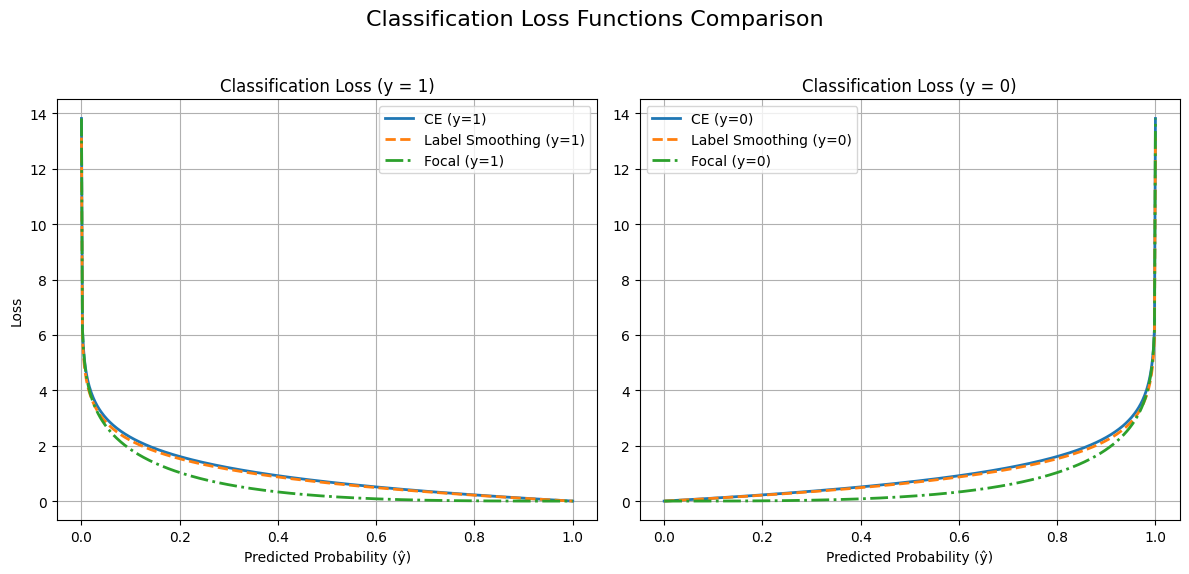

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 预测概率范围
p = np.linspace(1e-6, 1 - 1e-6, 500) # 避免对数计算中的零（0 ～ 1）

# =========================
# 设置参数
epsilon = 0.1  # label smoothing
K = 2          # 类别数
gamma = 2.0    # focal loss
# =========================

# -------- y = 1（真实为正类） --------
ce_y1 = -np.log(p)
smooth_ce_y1 = -((1 - epsilon) * np.log(p) + (epsilon / K) * (np.log(p + 1e-12)))
focal_y1 = -((1 - p) ** gamma) * np.log(p)


# -------- y = 0（真实为负类） --------
ce_y0 = -np.log(1 - p)
smooth_ce_y0 = -((1 - epsilon) * np.log(1 - p) + (epsilon / K) * (np.log(1 - p + 1e-12)))
focal_y0 = -(p ** gamma) * np.log(1 - p)


# =========================
# 绘图
# =========================

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(p, ce_y1, label="CE (y=1)", linewidth=2)
plt.plot(p, smooth_ce_y1, label="Label Smoothing (y=1)", linestyle='--', linewidth=2)
plt.plot(p, focal_y1, label="Focal (y=1)", linestyle='-.', linewidth=2)
plt.title("Classification Loss (y = 1)")
plt.xlabel("Predicted Probability (ŷ)")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(p, ce_y0, label="CE (y=0)", linewidth=2)
plt.plot(p, smooth_ce_y0, label="Label Smoothing (y=0)", linestyle='--', linewidth=2)
plt.plot(p, focal_y0, label="Focal (y=0)", linestyle='-.', linewidth=2)
plt.title("Classification Loss (y = 0)")
plt.xlabel("Predicted Probability (ŷ)")
plt.grid(True)
plt.legend()

plt.suptitle("Classification Loss Functions Comparison", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [19]:
import numpy as np

# Binary Cross Entropy
def binary_cross_entropy(y_true, y_pred, eps=1e-12):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Categorical Cross Entropy (One-hot labels)
def categorical_cross_entropy(y_true, y_pred, eps=1e-12):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# Label Smoothing Cross Entropy
def label_smoothing_cross_entropy(y_true, y_pred, epsilon=0.1, eps=1e-12):
    K = y_true.shape[1]  # number of classes
    y_pred = np.clip(y_pred, eps, 1 - eps)
    y_smooth = (1 - epsilon) * y_true + epsilon / K
    return -np.mean(np.sum(y_smooth * np.log(y_pred), axis=1))

# Focal Loss (Binary classification only)
def focal_loss(y_true, y_pred, gamma=2.0, eps=1e-12):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    pt = np.where(y_true == 1, y_pred, 1 - y_pred)
    return -np.mean((1 - pt) ** gamma * np.log(pt))

# KL Divergence (One-hot true vs predicted probability)
def kl_divergence(y_true, y_pred, eps=1e-12):
    y_true = np.clip(y_true, eps, 1 - eps)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return np.mean(np.sum(y_true * np.log(y_true / y_pred), axis=1))

# Example usage
y_true = np.array([[1, 0], [0, 1], [1, 0]])
y_pred = np.array([[0.9, 0.1], [0.2, 0.8], [0.6, 0.4]])
print("Binary Cross Entropy:", binary_cross_entropy(y_true[:, 0], y_pred[:, 0]))
print("Categorical Cross Entropy:", categorical_cross_entropy(y_true, y_pred))
print("Label Smoothing Cross Entropy:", label_smoothing_cross_entropy(y_true, y_pred))
print("Focal Loss:", focal_loss(y_true[:, 0], y_pred[:, 0]))
print("KL Divergence:", kl_divergence(y_true, y_pred))  


Binary Cross Entropy: 0.2797765635793423
Categorical Cross Entropy: 0.2797765635793423
Label Smoothing Cross Entropy: 0.3462596310220802
Focal Loss: 0.03057048233723506
KL Divergence: 0.2797765635520409


In [ ]:
# 练习: 使用pytorch实现这些损失函数
import torch

# Mean Squared Error (MSE) in PyTorch
def binary_cross_entropy_torch(y_true, y_pred):
    pass

# Categorical Cross Entropy in PyTorch
def categorical_cross_entropy_torch(y_true, y_pred):
    pass

# Label Smoothing Cross Entropy in PyTorch
def label_smoothing_cross_entropy_torch(y_true, y_pred, epsilon=0.1):
    pass

# Focal Loss in PyTorch
def focal_loss_torch(y_true, y_pred, gamma=2.0):
    pass          

# KL Divergence in PyTorch
def kl_divergence_torch(y_true, y_pred):
    pass

# Example usage in PyTorch
# 不要修改以下代码
y_true_torch = torch.tensor([[1.0, 0.0], [0.0, 1.0], [1.0, 0.0]])
y_pred_torch = torch.tensor([[0.9, 0.1], [0.2, 0.8], [0.6, 0.4]])
print("Binary Cross Entropy (PyTorch):", binary_cross_entropy_torch(y_true_torch[:, 0], y_pred_torch[:, 0]))
print("Categorical Cross Entropy (PyTorch):", categorical_cross_entropy_torch(y_true_torch, y_pred_torch))
print("Label Smoothing Cross Entropy (PyTorch):", label_smoothing_cross_entropy_torch(y_true_torch, y_pred_torch))
print("Focal Loss (PyTorch):", focal_loss_torch(y_true_torch[:, 0], y_pred_torch[:, 0]))
print("KL Divergence (PyTorch):", kl_divergence_torch(y_true_torch, y_pred_torch))

assert torch.allclose(binary_cross_entropy_torch(y_true_torch[:, 0], y_pred_torch[:, 0]), torch.tensor(0.2798), atol=1e-4)
assert torch.allclose(categorical_cross_entropy_torch(y_true_torch, y_pred_torch), torch.tensor(0.2798), atol=1e-4)
assert torch.allclose(label_smoothing_cross_entropy_torch(y_true_torch, y_pred_torch), torch.tensor(0.3463), atol=1e-4)
assert torch.allclose(focal_loss_torch(y_true_torch[:, 0], y_pred_torch[:, 0]), torch.tensor(0.0306), atol=1e-4)
assert torch.allclose(kl_divergence_torch(y_true_torch, y_pred_torch), torch.tensor(0.2798), atol=1e-4)
print("恭喜你！测试通过！")

Binary Cross Entropy (PyTorch): tensor(0.2798)
Categorical Cross Entropy (PyTorch): tensor(0.2798)
Label Smoothing Cross Entropy (PyTorch): tensor(0.3463)
Focal Loss (PyTorch): tensor(0.0306)
KL Divergence (PyTorch): tensor(0.2798)
恭喜你！测试通过！


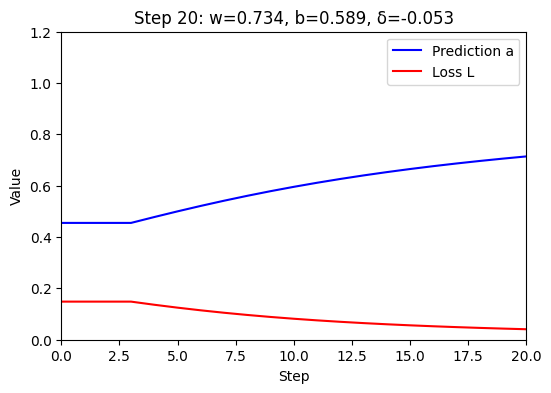

In [1]:
# 动画演示反向传播过程

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


# 激活函数 & 导数（sigmoid）
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

# 数据 & 初始参数
x = 0.6   # 输入
y = 1.0   # 目标
w, b = 0.2, -0.3
eta = 0.5  # 学习率

# 记录轨迹
steps = 20
history = []

for _ in range(steps):
    # 前向传播
    z = w * x + b
    a = sigmoid(z)
    L = 0.5 * (a - y) ** 2  # MSE损失
    
    # 反向传播
    dL_da = (a - y)
    da_dz = sigmoid_deriv(z)
    dz_dw = x
    dz_db = 1
    delta = dL_da * da_dz  # δ = ∂L/∂z
    
    grad_w = delta * dz_dw
    grad_b = delta * dz_db
    
    # 更新权重
    w -= eta * grad_w
    b -= eta * grad_b

    history.append((w, b, a, L, delta))

# 动画
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(0, steps)
ax.set_ylim(0, 1.2)
line_a, = ax.plot([], [], 'b-', label='Prediction a')
line_L, = ax.plot([], [], 'r-', label='Loss L')
ax.legend()
ax.set_title("Backpropagation: Prediction & Loss Over Steps")
ax.set_xlabel("Step")
ax.set_ylabel("Value")

a_vals, L_vals = [], []

def update(frame):
    w_, b_, a_, L_, delta_ = history[frame]
    a_vals.append(a_)
    L_vals.append(L_)
    line_a.set_data(range(len(a_vals)), a_vals)
    line_L.set_data(range(len(L_vals)), L_vals)
    ax.set_title(f"Step {frame+1}: w={w_:.3f}, b={b_:.3f}, δ={delta_:.3f}")
    return line_a, line_L

ani = FuncAnimation(fig, update, frames=steps, blit=True, interval=500, repeat=False)
HTML(ani.to_jshtml())

In [ ]:
import numpy as np

# 设置随机种子
np.random.seed(43)

# 激活函数及其导数
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return sigmoid(x) * (1 - sigmoid(x))

# 初始化参数
W1 = np.random.randn(2, 3)  # shape: (2, 3) 输入层->隐藏层
b1 = np.zeros((1, 3)) # 广播机制
W2 = np.random.randn(3, 1)  # shape: (3, 1) 隐藏层->输出层
b2 = np.zeros((1, 1)) # 广播机制
lr = 0.1

# 前向传播
def forward(X):
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

# 损失（MSE）
def mse(y, y_hat): return np.mean((y - y_hat)**2)

# 反向传播
def backward(X, y, z1, a1, z2, a2):
    m = y.shape[0] # 样本数
    delta2 = (a2 - y) * sigmoid_deriv(z2) # 输出层误差
    dW2 = a1.T @ delta2 / m # 输出层权重梯度
    db2 = np.sum(delta2, axis=0, keepdims=True) / m # 输出层偏置梯度

    delta1 = (delta2 @ W2.T) * sigmoid_deriv(z1) # 隐藏层误差
    dW1 = X.T @ delta1 / m # 隐藏层权重梯度
    db1 = np.sum(delta1, axis=0, keepdims=True) / m # 隐藏层偏置梯度
    return dW1, db1, dW2, db2 # 返回梯度

# 训练
X = np.array([[0,0],[0,1],[1,0],[1,1]]) # shape: (4, 2)
y = np.array([[0],[1],[1],[0]])  # XOR
for epoch in range(10000):
    z1,a1,z2,a2 = forward(X)
    dW1,db1,dW2,db2 = backward(X,y,z1,a1,z2,a2)
    W1 -= lr*dW1; b1 -= lr*db1
    W2 -= lr*dW2; b2 -= lr*db2
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {mse(y,a2):.4f}")

Epoch 0: Loss = 0.3741
Epoch 1000: Loss = 0.2462
Epoch 2000: Loss = 0.2399
Epoch 3000: Loss = 0.2296
Epoch 4000: Loss = 0.2139
Epoch 5000: Loss = 0.1918
Epoch 6000: Loss = 0.1599
Epoch 7000: Loss = 0.1168
Epoch 8000: Loss = 0.0758
Epoch 9000: Loss = 0.0487


In [ ]:
import torch

# 设置随机种子
torch.manual_seed(666)

# 激活函数及其导数
def sigmoid_torch(x): 
    pass
def sigmoid_deriv_torch(x): 
    pass

W1 = torch.randn((2, 3), dtype=torch.float32) # shape: (2, 3)
b1 = torch.zeros((1, 3), dtype=torch.float32) # shape: (1, 3)
W2 = torch.randn((3, 1), dtype=torch.float32) # shape: (3, 1)
b2 = torch.zeros((1, 1), dtype=torch.float32) # shape: (1, 1)
lr = 0.1

# 前向传播
def forward(X):
    pass

# 损失 (MSE)
def mse(y, y_hat): 
    pass

# 反向传播
def backward(X, y, z1, a1, z2, a2):
    pass


# 训练数据
X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]], dtype=torch.float32)
y = torch.tensor([[0.],[1.],[1.],[0.]], dtype=torch.float32)

# 训练
for epoch in range(10000):
    z1, a1, z2, a2 = forward(X)
    dW1, db1, dW2, db2 = backward(X, y, z1, a1, z2, a2)
    W1 -= lr * dW1; b1 -= lr * db1
    W2 -= lr * dW2; b2 -= lr * db2
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {mse(y, a2).item():.4f}")


/var/folders/4s/crpnw5s15gbchbjb65z7hqbm0000gn/T/ipykernel_58160/2524335622.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  def sigmoid(x): return 1 / (1 + np.exp(-x))


Epoch 0: Loss = 0.2889
Epoch 1000: Loss = 0.2354
Epoch 2000: Loss = 0.2156
Epoch 3000: Loss = 0.1943
Epoch 4000: Loss = 0.1738
Epoch 5000: Loss = 0.1515
Epoch 6000: Loss = 0.1220
Epoch 7000: Loss = 0.0876
Epoch 8000: Loss = 0.0591
Epoch 9000: Loss = 0.0406


In [18]:
import torch
import torch.nn as nn

# 设置随机种子
torch.manual_seed(666)

# 数据
X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]], dtype=torch.float32)
y = torch.tensor([[0.],[1.],[1.],[0.]], dtype=torch.float32)

# 定义模型
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 3)
        self.output = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

model = XORNet()

# 损失函数
criterion = nn.MSELoss()
lr = 0.1  # 学习率
# optimizer = torch.optim.SGD(model.parameters(), lr=lr)  # 使用SGD优化器


# 训练（手动更新参数）
for epoch in range(10000):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # 反向传播
    model.zero_grad()
    loss.backward()

    # 手动更新参数
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad

    # 反向传播 & 参数更新
    # optimizer.zero_grad()
    # loss.backward()
    # optimizer.step()


    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# 预测
print("Predictions:", model(X).detach().numpy())


Epoch 0: Loss = 0.2514
Epoch 1000: Loss = 0.2488
Epoch 2000: Loss = 0.2469
Epoch 3000: Loss = 0.2415
Epoch 4000: Loss = 0.2271
Epoch 5000: Loss = 0.2023
Epoch 6000: Loss = 0.1757
Epoch 7000: Loss = 0.1402
Epoch 8000: Loss = 0.0859
Epoch 9000: Loss = 0.0439
Predictions: [[0.1145196 ]
 [0.85139835]
 [0.85129756]
 [0.20434527]]
